### 🔴 Preprocessing - Text Cleaning and Preparation
Here we convert raw tweets into structured, clean data - which is essential for model training.

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [3]:
# Loading Dataset
file_path = "/Users/ratulmukherjee/Desktop/Hate Speech Detection/data/hate_speech.csv"
df = pd.read_csv(file_path)
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
# Basic Text Normalization
# Converting all text to lowercase
df['tweet'] = df['tweet'].astype(str).str.lower()

In [14]:
# Defining a Text Cleaning Function
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Removing URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # Removing user mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)
    
    # Removing punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Removing numbers
    text = re.sub(r'\d+', '', text)
    
    # Removing stopwords and lemmatize
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

# Setting of English stopwords
stop_words = set(stopwords.words('english'))

# WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Final preprocessing function
def preprocess(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ratulmukherjee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ratulmukherjee/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The above function removes -
1. URLs, mentions, numbers, punctuation
2. Stopwords (like "the", "and")
3. Applies lemmatization (reduce words to root form)*

In [15]:
# Applying Cleaning Function
df['clean_tweet'] = df['tweet'].apply(clean_text)
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,!!! rt @mayasolovely: as a woman you shouldn't...,rt woman shouldnt complain cleaning house amp ...
1,!!!!! rt @mleew17: boy dats cold...tyga dwn ba...,rt boy dat coldtyga dwn bad cuffin dat hoe st ...
2,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...,rt dawg rt ever fuck bitch start cry confused ...
3,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,rt look like tranny
4,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,rt shit hear might true might faker bitch told ya


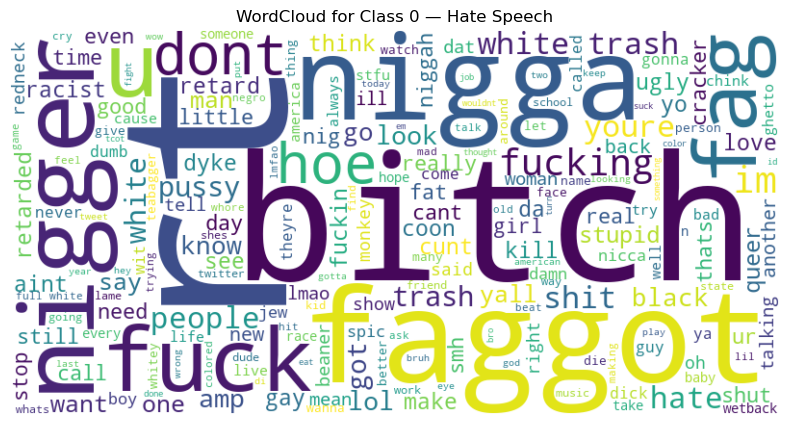

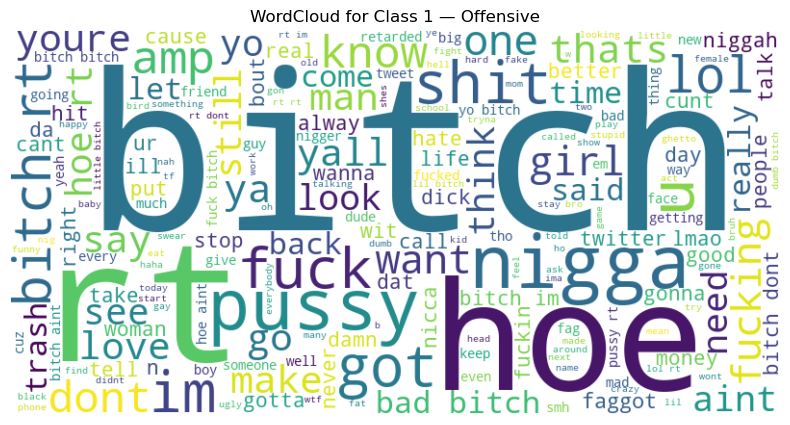

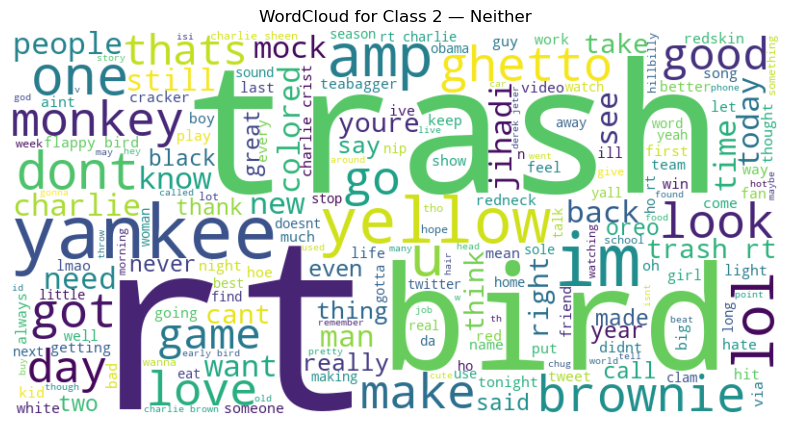

In [16]:
# WordCloud for each Class
for cls in sorted(df['class'].unique()):
    text = " ".join(df[df['class'] == cls]['clean_tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Class {cls} — " + 
              ("Hate Speech" if cls==0 else "Offensive" if cls==1 else "Neither"))
    plt.show()

In [19]:
# Keeping only required columns i.e. clean tweet and class columns
df = df[['clean_tweet', 'class']]
df.head()

,clean_tweet,class
0,rt woman shouldnt complain cleaning house amp ...,2
1,rt boy dat coldtyga dwn bad cuffin dat hoe st ...,1
2,rt dawg rt ever fuck bitch start cry confused ...,1
3,rt look like tranny,1
4,rt shit hear might true might faker bitch told ya,1


In [20]:
# Saving Cleaned Data
df.to_csv("/Users/ratulmukherjee/Desktop/Hate Speech Detection/data/cleaned_data.csv", index=False)